### IV Stock Prediction

### Part 1. Predicting Bid 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
import seaborn as sns
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor

In [2]:
df = pd.read_csv("C:\\Users\\daivi\\Desktop\\CBD 2214 Big Data Fundamentals\\In Class Assignment\\Inclass Activity 3\\week5 inclass.csv")

In [3]:
df.shape

(221046, 22)

In [4]:
df

,symbol,exchange,date,adjusted close,option symbol,expiration,strike,call/put,style,ask,...,iv,volume,open interest,stock price for iv,*,delta,vega,gamma,theta,rho
0,SPY,NYSEArca,07/30/2021,438.51,SPY 210730C00215000,07/30/2021,215.0,C,A,224.56,...,-1.000000,0,0,438.97,NaN,0.000000,0.000000,0.000000,0.000000,0.000000
1,SPY,NYSEArca,07/30/2021,438.51,SPY 210730P00215000,07/30/2021,215.0,P,A,0.01,...,-1.000000,0,1401,438.97,NaN,0.000000,0.000000,0.000000,0.000000,0.000000
2,SPY,NYSEArca,07/30/2021,438.51,SPY 210730C00220000,07/30/2021,220.0,C,A,219.56,...,-1.000000,0,1,438.97,NaN,0.000000,0.000000,0.000000,0.000000,0.000000
3,SPY,NYSEArca,07/30/2021,438.51,SPY 210730P00220000,07/30/2021,220.0,P,A,0.01,...,-1.000000,50,328,438.97,NaN,0.000000,0.000000,0.000000,0.000000,0.000000
4,SPY,NYSEArca,07/30/2021,438.51,SPY 210730C00225000,07/30/2021,225.0,C,A,214.56,...,-1.000000,0,0,438.97,NaN,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
221041,SPY,NYSEArca,07/01/2021,430.43,SPY 231215P00630000,12/15/2023,630.0,P,A,206.50,...,0.148305,0,1,430.26,*,-0.924500,0.750370,0.001112,-0.011128,-14.857175
221042,SPY,NYSEArca,07/01/2021,430.43,SPY 231215C00635000,12/15/2023,635.0,C,A,2.20,...,0.148310,0,146,430.26,NaN,0.051628,0.710649,0.001053,-0.005507,0.496773
221043,SPY,NYSEArca,07/01/2021,430.43,SPY 231215P00635000,12/15/2023,635.0,P,A,211.50,...,0.148310,0,0,430.26,*,-0.928176,0.710649,0.001053,-0.010792,-15.014119
221044,SPY,NYSEArca,07/01/2021,430.43,SPY 231215C00640000,12/15/2023,640.0,C,A,2.73,...,0.148310,5,1,430.26,*,0.048170,0.672488,0.000997,-0.005217,0.463973


#### In this dataset we have 21 Features(Columns) and 221046 Samples(Rows)

### Feature descriptions:

- **symbol**: the underlying stock

- **date**: the dataset date

- **adjusted close**: the closing price of the underlying stock after extended trading session

- **stock price**: the closing price of the underlying stock

- **option symbol**: string combining other fields identifying the option

- **expiration**: date that the option expires

- **strike**: the price that the option gives you the right to trade the underlying stock

- **call/put**: whether the option is a Call (right to buy underlying stock) or a Put (right to sell underlying stock)

- **ask/bid/meanprice**: market prices of the option (last offer to sell, last offer to buy, and the average of the two prices)

- **iv**: how fearful the market is of a market crash or severe decline in prices

- **volume**: number of contracts traded today

- **open interest**: number of contracts currently held
- **delta** - represents the rate of change between the options price and the 1$ change in the underlying stock(price sensitivity of the option)
- **vega** - represents the rate of change between an options value and the underlying assets. This is the option's sensitivity to volatility
- **theta** -  represents the rate of change between the option price and time, or time sensitivity - sometimes known as an option's time decay.
- **gamma** -  represents the rate of change between an option's delta and the underlying asset's price. This is called second-order (second-derivative) price sensitivity. 
- **rho** - represents the rate of change between an option's value and a 1% change in the interest rate. This measures sensitivity to the interest rate.

In [5]:
# Checking the data types
print(df.dtypes)

symbol                 object
exchange               object
date                   object
adjusted close        float64
option symbol          object
expiration             object
strike                float64
call/put               object
style                  object
ask                   float64
bid                   float64
mean price            float64
iv                    float64
volume                  int64
open interest           int64
stock price for iv    float64
*                      object
delta                 float64
vega                  float64
gamma                 float64
theta                 float64
rho                   float64
dtype: object


##### As we can see that we need to change the datatype of date feature(Column)

In [6]:
# Convert date column to datetime format
df['date'] = pd.to_datetime(df['date'])

In [7]:
# We also need to convert expiration column to datetime
df['expiration'] = pd.to_datetime(df['expiration'])

In [8]:
# Lets convert the 'date' column to datetime format for easy filtering
df['date'] = pd.to_datetime(df['date'], format='%m/%d/%Y')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 221046 entries, 0 to 221045
Data columns (total 22 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   symbol              221046 non-null  object        
 1   exchange            221046 non-null  object        
 2   date                221046 non-null  datetime64[ns]
 3   adjusted close      221046 non-null  float64       
 4   option symbol       221046 non-null  object        
 5   expiration          221046 non-null  datetime64[ns]
 6   strike              221046 non-null  float64       
 7   call/put            221046 non-null  object        
 8   style               221046 non-null  object        
 9   ask                 221046 non-null  float64       
 10  bid                 221046 non-null  float64       
 11  mean price          221046 non-null  float64       
 12  iv                  221046 non-null  float64       
 13  volume              221046 no

We have changed the datatype of data and expiration column to datetime

In [10]:
# Lets extract some features from the date column

df['day_of_week'] = df['date'].dt.dayofweek
df['month'] = df['date'].dt.month
df['day_of_month'] = df['date'].dt.day

In [11]:
# Lets extract some features from the expiration column

df['exp_day_of_week'] = df['expiration'].dt.dayofweek
df['exp_month'] = df['expiration'].dt.month
df['exp_day_of_month'] = df['expiration'].dt.day

In [12]:
df['date'].unique()

<DatetimeArray>
['2021-07-30 00:00:00', '2021-07-29 00:00:00', '2021-07-28 00:00:00',
 '2021-07-27 00:00:00', '2021-07-26 00:00:00', '2021-07-23 00:00:00',
 '2021-07-22 00:00:00', '2021-07-21 00:00:00', '2021-07-20 00:00:00',
 '2021-07-19 00:00:00', '2021-07-16 00:00:00', '2021-07-15 00:00:00',
 '2021-07-14 00:00:00', '2021-07-13 00:00:00', '2021-07-12 00:00:00',
 '2021-07-09 00:00:00', '2021-07-08 00:00:00', '2021-07-07 00:00:00',
 '2021-07-06 00:00:00', '2021-07-02 00:00:00', '2021-07-01 00:00:00']
Length: 21, dtype: datetime64[ns]

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 221046 entries, 0 to 221045
Data columns (total 28 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   symbol              221046 non-null  object        
 1   exchange            221046 non-null  object        
 2   date                221046 non-null  datetime64[ns]
 3   adjusted close      221046 non-null  float64       
 4   option symbol       221046 non-null  object        
 5   expiration          221046 non-null  datetime64[ns]
 6   strike              221046 non-null  float64       
 7   call/put            221046 non-null  object        
 8   style               221046 non-null  object        
 9   ask                 221046 non-null  float64       
 10  bid                 221046 non-null  float64       
 11  mean price          221046 non-null  float64       
 12  iv                  221046 non-null  float64       
 13  volume              221046 no

In [14]:
df['month']

0         7
1         7
2         7
3         7
4         7
         ..
221041    7
221042    7
221043    7
221044    7
221045    7
Name: month, Length: 221046, dtype: int32

In [15]:
df['exp_month']

0          7
1          7
2          7
3          7
4          7
          ..
221041    12
221042    12
221043    12
221044    12
221045    12
Name: exp_month, Length: 221046, dtype: int32

In [16]:
# Select numerical features
numerical_features = df.select_dtypes(include=['int','float']).columns.tolist()

In [17]:
numerical_features.remove('bid')

In [18]:
numerical_features

['adjusted close',
 'strike',
 'ask',
 'mean price',
 'iv',
 'volume',
 'open interest',
 'stock price for iv',
 'delta',
 'vega',
 'gamma',
 'theta',
 'rho',
 'day_of_week',
 'month',
 'day_of_month',
 'exp_day_of_week',
 'exp_month',
 'exp_day_of_month']

### Lets split our dataset into Train and Test

In [19]:
# Lets split our dataset into train and test
# Our train data should contain the df records of the date 1 july 2021 to 29 july 2021
# Our test data should contain the records from 30 July 2021


start_date = '2021-07-01'
end_date = '2021-07-29'

# Lets filter the data for July 1st to July 29, and test for July 30th
train_data = df[(df['date'] >= start_date) & (df['date'] <= end_date)]
test_data = df[df['date'] == '2021-07-30']

# Now lets separate our features and target
# X_train is the numerical records of our train_data 
X = train_data[numerical_features]

# y_train is the records from our train_data of the column 'bid' 
y = train_data['bid']


# X_test is the records from our test_data without our target_feature('bid') and 'date' and 'expiration' columns
X_test = test_data[numerical_features]
# y_test is the records from our test_data of the column 'bid' 
y_test = test_data['bid']


# Split the data into training and validation sets within the training data
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=67)

In [20]:
print("Train data shape: ", train_data.shape)
print("Test data shape: ", test_data.shape)
print("Data frame shape: ", df.shape)

Train data shape:  (210320, 28)
Test data shape:  (10726, 28)
Data frame shape:  (221046, 28)


### Linear Regression Without Scaling

In [21]:
linear_regression_model = LinearRegression()
linear_regression_model.fit(X_train, y_train)

LinearRegression()

In [158]:
# Lets validate using the validation data
y_val_pred = linear_regression_model.predict(X_val)
# Lets get the mean squared error of the validation data
linear_regression_val_mse = mean_squared_error(y_val, y_val_pred)
linear_regression_val_r2 = r2_score(y_val, y_val_pred)

print("Linear Regression Mean squared error of the Validation data without scaling: ", linear_regression_val_mse)
print("Linear Regression R2 Score of the Validation data without scaling: ", linear_regression_val_r2)


# Lets now Test on the test data
y_test_pred = linear_regression_model.predict(X_test)
linear_regression_test_mse = mean_squared_error(y_test, y_test_pred)
linear_regression_test_r2 = r2_score(y_test, y_test_pred)

print("Linear Regression Mean squared error of the Test data without scaling: ", linear_regression_test_mse)
print("Linear Regression R2 Score of the Test data without scaling: ", linear_regression_test_r2)

Linear Regression Mean squared error of the Validation data without scaling:  0.012441522775408729
Linear Regression R2 Score of the Validation data without scaling:  0.9999965801043209
Linear Regression Mean squared error of the Test data without scaling:  0.008204292449294642
Linear Regression R2 Score of the Test data without scaling:  0.9999976951402535


### Linear Regression With scaling

In [23]:
# First lets import the module from StandardScaler
from sklearn.preprocessing import StandardScaler

In [24]:
scaler = StandardScaler()

# Lets standardize the data
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

In [25]:
print("bid column minimum value: ", df['bid'].min())
print("bid column minimum value: ", df['bid'].max())

bid column minimum value:  0.0
bid column minimum value:  415.23


In [26]:
print("Minimum of y_train(y_train is the training set of our column bid): ", y_train.min())
print("Maximum of y_train(y_train is the training set of our column bid): ", y_train.max())

Minimum of y_train(y_train is the training set of our column bid):  0.0
Maximum of y_train(y_train is the training set of our column bid):  415.23


In [27]:
# Lets standardize the target data
target_scaler = StandardScaler()

y_train_scaled = target_scaler.fit_transform(y_train.values.reshape(-1, 1))
y_val_scaled = target_scaler.transform(y_val.values.reshape(-1, 1))
y_test_scaled = target_scaler.transform(y_test.values.reshape(-1, 1))

In [28]:
# Now lets run the linear regression model on the scaled data
linear_regression_model_scaled = LinearRegression()
linear_regression_model_scaled.fit(X_train_scaled, y_train_scaled)

LinearRegression()

In [154]:
# Now lets validate on the validation data
y_val_pred_scaled = linear_regression_model_scaled.predict(X_val_scaled)

# Now lets get the mean squared error of the validation data
linear_regression_val_scaled_mse = mean_squared_error(y_val_scaled, y_val_pred_scaled)
linear_regression_val_scaled_r2 = r2_score(y_val_scaled, y_val_pred_scaled)

print("Linear Regression Mean squared error of the Validation data with scaling: ", linear_regression_val_scaled_mse)
print("Linear Regression R2 Scorer of the Validation data with scaling: ", linear_regression_val_scaled_r2)

Linear Regression Mean squared error of the Validation data with scaling:  3.4814974468209578e-06
Linear Regression R2 Scorer of the Validation data with scaling:  0.9999965801043209


- R2 Score close to 1, this shows us that our model is predicting well
- MSE value is very low, this tells us that our error is very less, our model is predicting the values very close to the actual values

In [155]:
# Test on test data
y_test_pred_scaled = linear_regression_model_scaled.predict(X_test_scaled)
linear_regression_test_scaled_mse = mean_squared_error(y_test_scaled, y_test_pred_scaled)

# Lets validate using the test data
y_test_pred_scaled = linear_regression_model_scaled.predict(X_test_scaled)


# Inverse transform the predictions to original scale
y_val_pred = target_scaler.inverse_transform(y_val_pred_scaled.reshape(-1, 1))
y_test_pred = target_scaler.inverse_transform(y_test_pred_scaled.reshape(-1, 1))

# Inverse transform the predictions to original scale
y_val_pred = target_scaler.inverse_transform(y_val_pred_scaled.reshape(-1, 1))
y_test_pred = target_scaler.inverse_transform(y_test_pred_scaled.reshape(-1, 1))

# Lets get the mean squared error of the test data
linear_regression_test_scaled_mse = mean_squared_error(y_test_scaled, y_test_pred_scaled)
linear_regression_test_scaled_r2 = r2_score(y_test_scaled, y_test_pred_scaled)


print("Linear Regression Mean squared error of the Validation data without scaling: ", linear_regression_test_scaled_mse)
print("Linear Regression R2 Scorer of the Test data with scaling: ", linear_regression_test_scaled_r2)

Linear Regression Mean squared error of the Validation data without scaling:  2.295798008876101e-06
Linear Regression R2 Scorer of the Test data with scaling:  0.9999976951402535


- Similar to the validation data our R2 Score close to 1, this shows us that our model is predicting well
- MSE value is very low, this tells us that our error is very less, our model is predicting the values very close to the actual values. 

In [159]:
print("Linear Regression Validation MSE with scaling:", linear_regression_val_scaled_mse)
print("Linear Regression R2 Score of the Validation data with scaling: ", linear_regression_val_scaled_r2)

print("Linear Regression Test MSE with scaling:", linear_regression_test_scaled_mse)
print("Linear Regression R2 Score of the Test data with scaling: ", linear_regression_test_scaled_r2)

print("Linear Regression Validation MSE without scaling:", linear_regression_val_mse)
print("Linear Regression R2 Score of the Validation data without scaling: ", linear_regression_val_r2)

print("Linear Regression Test MSE without scaling:", linear_regression_test_mse)
print("Linear Regression R2 Score of the Test data without scaling: ", linear_regression_test_r2)

Linear Regression Validation MSE with scaling: 3.4814974468209578e-06
Linear Regression R2 Score of the Validation data with scaling:  0.9999965801043209
Linear Regression Test MSE with scaling: 2.295798008876101e-06
Linear Regression R2 Score of the Test data with scaling:  0.9999976951402535
Linear Regression Validation MSE without scaling: 0.012441522775408729
Linear Regression R2 Score of the Validation data without scaling:  0.9999965801043209
Linear Regression Test MSE without scaling: 0.008204292449294642
Linear Regression R2 Score of the Test data without scaling:  0.9999976951402535


As the MSE values for both the validation and test data are relatively close, this shows us that the model is predicting well and does not overfit the training data<br>

The MSE values in the original scale (0.0124 for validation and 0.0082 for test) indicate that the model is making predictions that are close to our actual values of bid
<br>

The R2 score in all the cases is very close to 1, shows that our model is predicting well
<br>

The very low MSE values with scaling (3.4814974468209578e-06 and 2.295798008876101e-06) indicate that the model benefits from scaling. These values are not ver interpretable but they show that the model fits well to the scaled data

## Lets visualize how well the models predictions match the original values

### Using Scatter plot to visualize the data between Actual and Predicted values for Validation and Test data

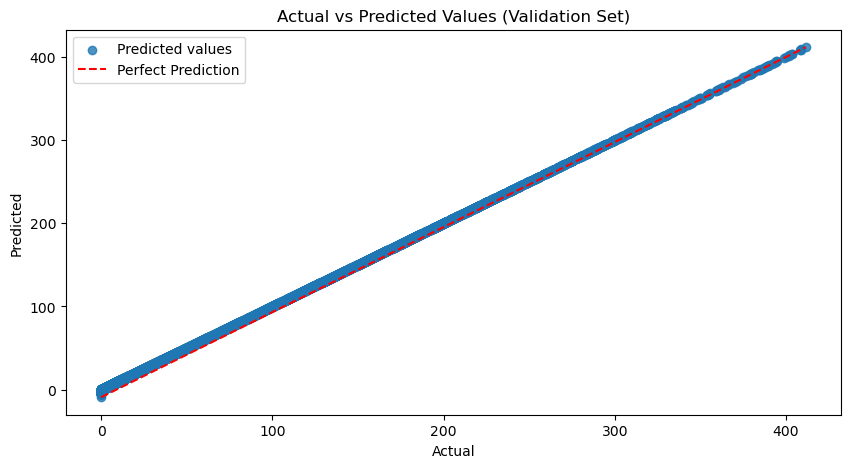

In [32]:
# Lets visualize how well the models predictions match the original values]

# Plot Actual vs Predicted for Validation set
plt.figure(figsize = (10, 5))
plt.scatter(y_val, y_val_pred, alpha = 0.8, label = 'Predicted values')
plt.plot([y_val.min(), y_val.max()], [y_val_pred.min(), y_val_pred.max()], 'r--', label = 'Perfect Prediction')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted Values (Validation Set)')
plt.legend()
plt.show()



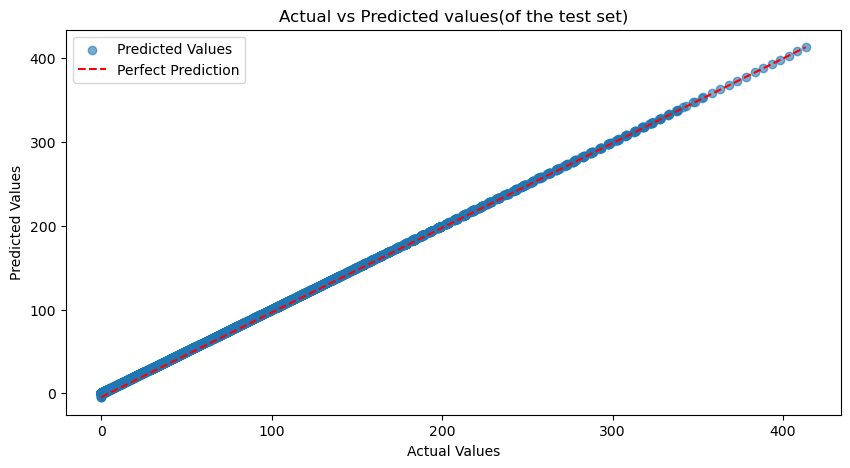

In [33]:
plt.figure(figsize = (10, 5))
plt.scatter(y_test, y_test_pred, alpha = 0.6, label = "Predicted Values")
plt.plot([y_test.min(), y_test.max()], [y_test_pred.min(), y_test_pred.max()], 'r--', label = 'Perfect Prediction')
plt.xlabel('Actual Values')
plt.ylabel("Predicted Values")
plt.title('Actual vs Predicted values(of the test set)')
plt.legend()
plt.show()

### Using a Residual Plot for Validation and Test Set
- Residual plot shows the difference between the actual and predicted values in the model
- residual should be randomly scattered around zero, indicating that our models errors are at random and not biased

In [35]:
# Check the dimensions of y_test_pred and y_val_pred
print("Dimension of y_test_pred: ", y_test_pred.shape)
print("Dimension of y_val_pred: ", y_val_pred.shape)

Dimension of y_test_pred:  (10726, 1)
Dimension of y_val_pred:  (42064, 1)


- y_test_pred and  y_val_pred dimension is 2

In [36]:
# y_val_pred, y_test_pred are not 1 dimensional
# Flatten y_val_pred and y_test_pred to ensure they are 1 dimensional
y_val_pred = y_val_pred.flatten()
y_test_pred = y_test_pred.flatten()


# Calculate residuals for validation and test sets
residuals_val = y_val - y_val_pred
residuals_test = y_test - y_test_pred

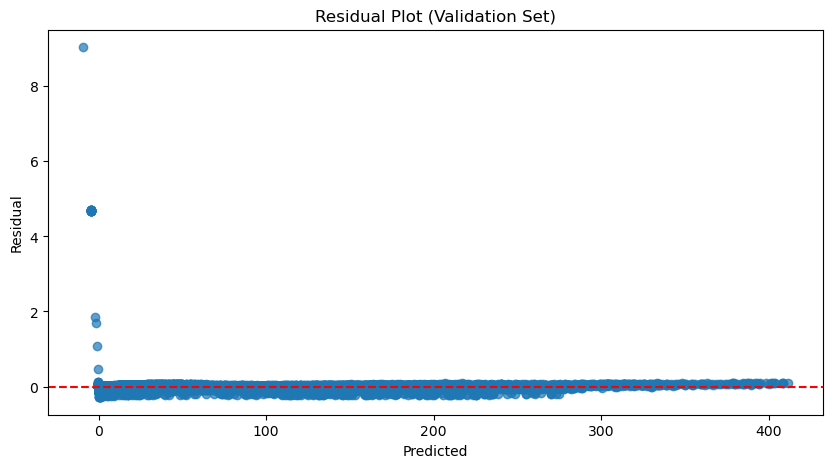

In [37]:
# Plot residuals for validation set
plt.figure(figsize=(10, 5))
plt.scatter(y_val_pred, residuals_val, alpha=0.7)
 # To add a horizontal line at y = 0, this line is a reference for zero error
plt.axhline(y=0, color='r', linestyle='--') 
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.title('Residual Plot (Validation Set)')
plt.show()

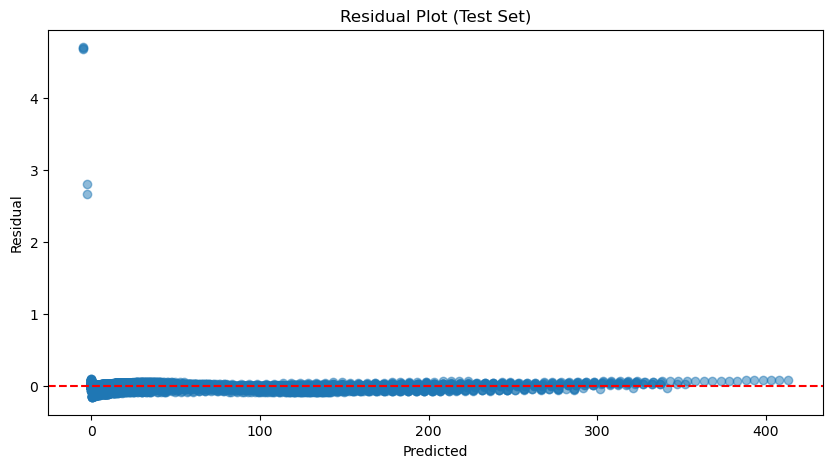

In [38]:
# Plot residuals for test set
plt.figure(figsize=(10, 5))
plt.scatter(y_test_pred, residuals_test, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.title('Residual Plot (Test Set)')
plt.show()

As we can see the data is randomly scattered around the zero line, this indicates the errors are random and there is no systematic bias

### Now lets check which features are important to us - Horizontal bar plot

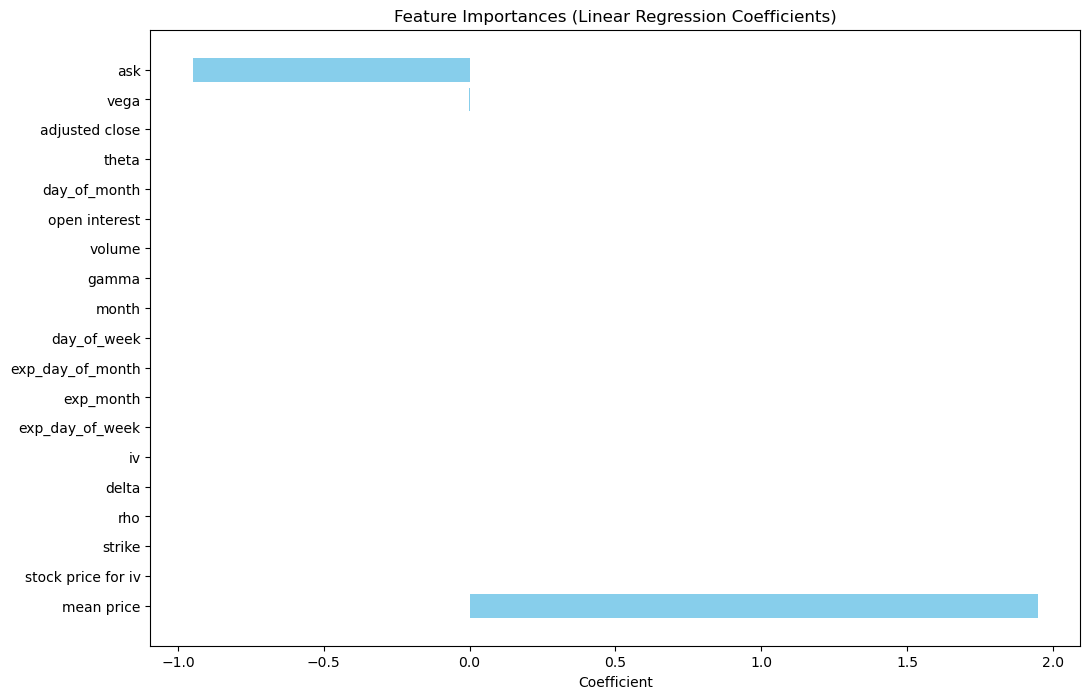

In [39]:
# Get feature importances (coefficients) from the linear regression model
feature_importances = linear_regression_model_scaled.coef_.flatten()
# Flatten method makes sure that our coefficients are 1 dimensional

# Create a DataFrame for visualization
feature_importance_df = pd.DataFrame({
    'Feature': numerical_features,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(12, 8))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
plt.xlabel('Coefficient')
plt.title('Feature Importances (Linear Regression Coefficients)')
plt.show()

As we can see mean price is the most important to our models prediction, ask also is a very relevant column

### KNN Model without scaling

In [40]:
# We have already created our train and test data
# and also created X_train, X_test, X_val, y_train, y_test, and y_val

In [41]:
knn_model = KNeighborsRegressor()
knn_model.fit(X_train, y_train)

KNeighborsRegressor()

In [42]:
# Lets validate on our validation data
y_val_pred = knn_model.predict(X_val)

# MSE - Mean Squared Error
knn_val_mse = mean_squared_error(y_val, y_val_pred)
knn_val_r2 = r2_score(y_val, y_val_pred)

print("MSE for Validation data without scaling: ", knn_val_mse)
print("R2 for Validation data without scaling: ", knn_val_r2)

MSE for Validation data without scaling:  6.289787427158616
R2 for Validation data without scaling:  0.9982710784497452


In [43]:
# Now lets test it on our test data
y_test_pred = knn_model.predict(X_test)

# MSE - Mean Squared Error
knn_test_mse = mean_squared_error(y_test, y_test_pred)
knn_test_r2 = r2_score(y_test, y_test_pred)

print("MSE for Validation data without scaling: ", knn_test_mse)
print("R2 for Validation data without scaling: ", knn_test_r2)

MSE for Validation data without scaling:  7.0358242990863324
R2 for Validation data without scaling:  0.998023401980009


In [44]:
print("KNN Validation MSE without scaling:", knn_val_mse)
print("KNN Validation R² without scaling:", knn_val_r2)
print("KNN Test MSE without scaling:", knn_test_mse)
print("KNN Test R² without scaling:", knn_test_r2)

KNN Validation MSE without scaling: 6.289787427158616
KNN Validation R² without scaling: 0.9982710784497452
KNN Test MSE without scaling: 7.0358242990863324
KNN Test R² without scaling: 0.998023401980009


- The MSE values of the valiudation data and test data are both low, this shows are predictions are pretty close to the actual values
- The R2 Scores are very high(almost 1). This indicates the model is a very good fit

### KNN Regressor With Scaling

In [45]:
scaler = StandardScaler()

# Standardize the features
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

In [46]:
target_scaler = StandardScaler()
# Standardize the target variable
y_train_scaled = target_scaler.fit_transform(y_train.values.reshape(-1, 1))
y_val_scaled = target_scaler.transform(y_val.values.reshape(-1, 1))
y_test_scaled = target_scaler.transform(y_test.values.reshape(-1, 1))

In [47]:
y_train_scaled.shape

(168256, 1)

In [48]:
y_train_scaled_ravel = y_train_scaled.ravel()
y_train_scaled_ravel.shape

(168256,)

In [49]:
# Lets train the model with scaling the features
knn_model_scaled = KNeighborsRegressor()
knn_model_scaled.fit(X_train_scaled, y_train_scaled.ravel())
# I'm using ravel() because the y_train_scaled is 2 dimensional

KNeighborsRegressor()

In [50]:
# Now lets validate on the validation set

y_val_pred_scaled = knn_model_scaled.predict(X_val_scaled)
knn_val_mse_scaled = mean_squared_error(y_val_scaled, y_val_pred_scaled)
knn_val_r2_scaled = r2_score(y_val_scaled, y_val_pred_scaled)

print("KNN Validation MSE with scaling:", knn_val_mse_scaled)
print("KNN Validation R² with scaling:", knn_val_r2_scaled)

KNN Validation MSE with scaling: 0.0016204917710934423
KNN Validation R² with scaling: 0.9984081812810214


In [51]:
# Now lets test on our testing data

y_test_pred_scaled = knn_model_scaled.predict(X_test_scaled)
knn_test_mse_scaled = mean_squared_error(y_test_scaled, y_test_pred_scaled)
knn_test_r2_scaled = r2_score(y_test_scaled, y_test_pred_scaled)

print("KNN Test MSE with scaling:", knn_test_mse_scaled)
print("KNN Test R² with scaling:", knn_test_r2_scaled)

KNN Test MSE with scaling: 0.0011185205556547373
KNN Test R² with scaling: 0.9988770645351035


In [52]:
print("shape of y_val_pred: ", y_val_pred.shape)
print("shape of y_test_pred: ", y_test_pred.shape)

shape of y_val_pred:  (42064,)
shape of y_test_pred:  (10726,)


In [53]:
# Inverse transform the predictions to original scale
y_val_pred = target_scaler.inverse_transform(y_val_pred_scaled.reshape(-1, 1))
y_test_pred = target_scaler.inverse_transform(y_test_pred_scaled.reshape(-1, 1))

In [54]:
print("shape of y_val_pred: ", y_val_pred.shape)
print("shape of y_test_pred: ", y_test_pred.shape)

shape of y_val_pred:  (42064, 1)
shape of y_test_pred:  (10726, 1)


In [55]:
# Now lets view the mse and r2 score with adn without scaling

# without scaling
knn_val_mse_original = mean_squared_error(y_val, y_val_pred)
knn_val_r2_original = r2_score(y_val, y_val_pred)
knn_test_mse_original = mean_squared_error(y_test, y_test_pred)
knn_test_r2_original = r2_score(y_test, y_test_pred)

print("KNN Validation MSE in original scale:", knn_val_mse_original)
print("KNN Validation R² in original scale:", knn_val_r2_original)
print("KNN Test MSE in original scale:", knn_test_mse_original)
print("KNN Test R² in original scale:", knn_test_r2_original)
print('-'*50)

# with scaling
print("KNN Validation MSE with scaling:", knn_val_mse_scaled)
print("KNN Validation R² with scaling:", knn_val_r2_scaled)
print("KNN Test MSE with scaling:", knn_test_mse_scaled)
print("KNN Test R² with scaling:", knn_test_r2_scaled)

KNN Validation MSE in original scale: 5.791009640357552
KNN Validation R² in original scale: 0.9984081812810214
KNN Test MSE in original scale: 3.997159033003917
KNN Test R² in original scale: 0.9988770645351035
--------------------------------------------------
KNN Validation MSE with scaling: 0.0016204917710934423
KNN Validation R² with scaling: 0.9984081812810214
KNN Test MSE with scaling: 0.0011185205556547373
KNN Test R² with scaling: 0.9988770645351035


- Both the r2 scores of the scaled and unscaled models are very high, this indicates that the model fits the data well
- The MSE values in the original scale are higher compared to the MSE values in the scaled
- The validation and test MSE values are lower with scaling - this shows us that the features and target variable reduce prediction error when we scale the data

### Lets visualize our data

### Lets see the Actual Vs Predicted values, for the validation data and the test data

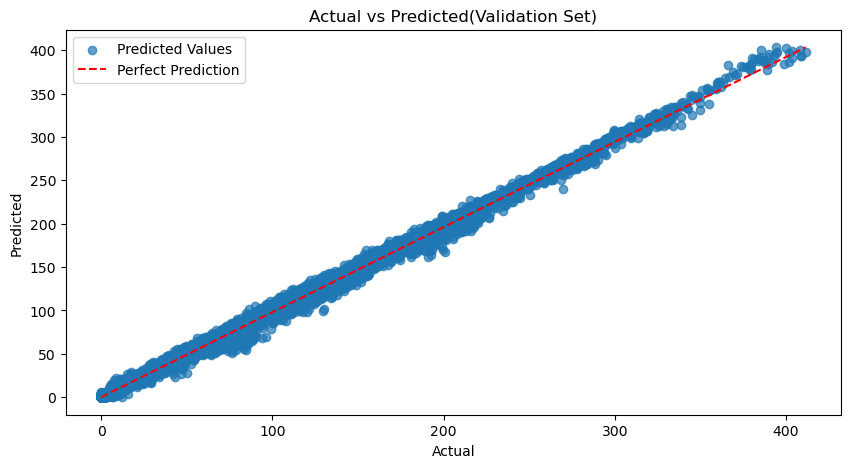

In [56]:
# Plot Actual vs Predicted for Validation set (Original Scale)
plt.figure(figsize = (10, 5))
plt.scatter(y_val, y_val_pred, alpha = 0.7, label = 'Predicted Values')
plt.plot([y_val.min(), y_val.max()], [y_val_pred.min(), y_val_pred.max()], 'r--', label = 'Perfect Prediction')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted(Validation Set)')
plt.legend()
plt.show()

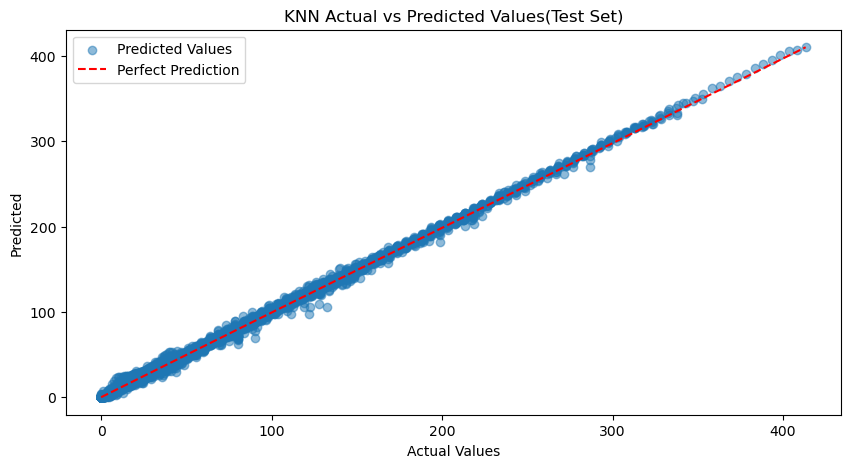

In [57]:
# Plot Actual vs Predicted for Test set (Original Scale)
plt.figure(figsize = (10, 5))
plt.scatter(y_test, y_test_pred, alpha = 0.5, label = 'Predicted Values')
plt.plot([y_test.min(), y_test.max()], [y_test_pred.min(), y_test_pred.max()], 'r--', label = 'Perfect Prediction')
plt.xlabel('Actual Values')
plt.ylabel('Predicted')
plt.title('KNN Actual vs Predicted Values(Test Set)')
plt.legend()
plt.show()

### Now lets see the Residual Plot
- Residual plot shows the difference between the actual and predicted values in the model
- residual should be randomly scattered around zero, indicating that our models errors are at random and not biased

In [61]:
print("Shape of y_val_pred: ", y_val_pred.shape)
print("Shape of y_test_pred: ", y_test_pred.shape)

Shape of y_val_pred:  (42064, 1)
Shape of y_test_pred:  (10726, 1)


In [62]:
# Flatten y_val_pred AND y_test_pred to ensure they are 1-dimensional
y_val_pred = y_val_pred.flatten()
y_test_pred = y_test_pred.flatten()

# Lets calculate the residuals for our validation data and our test data
# residual is the error - y - y_pred
residuals_val = y_val.values.flatten() - y_val_pred
residuals_test = y_test.values.flatten() - y_test_pred

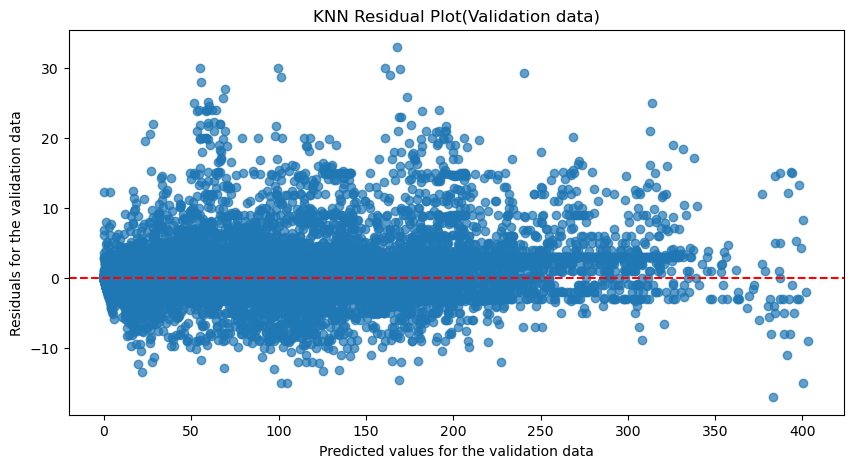

In [64]:
# Lets Plot the residuals for the validation set
plt.figure(figsize = (10, 5))
plt.scatter(y_val_pred, residuals_val, alpha = 0.7)
plt.axhline(y=0, color = 'r', linestyle = '--')
plt.xlabel('Predicted values for the validation data')
plt.ylabel('Residuals for the validation data')
plt.title('KNN Residual Plot(Validation data)')
plt.show()

- Residual is scattered around the zero line, this is good - there is no major bias in the predictions, and the errors are  distributed evenly around zero.\
- There are some poits which are far from the zero line, this indicates that there are some outliers

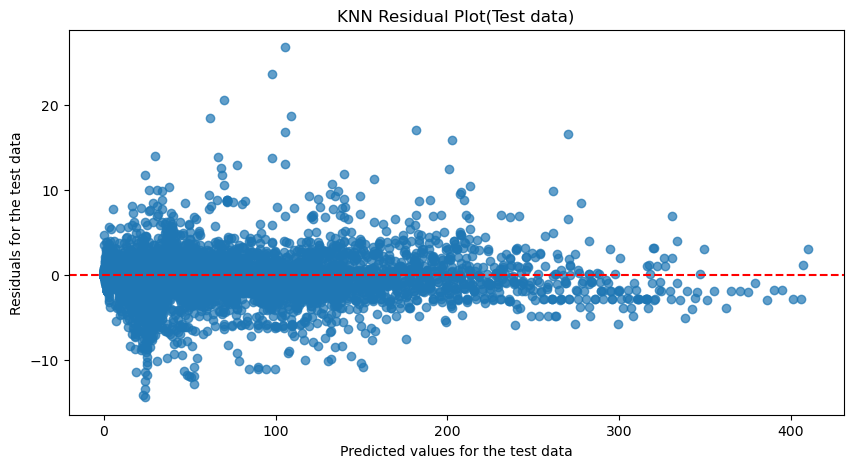

In [65]:
# Lets Plot the residuals for the test data
plt.figure(figsize = (10, 5))
plt.scatter(y_test_pred, residuals_test, alpha = 0.7)
plt.axhline(y=0, color = 'r', linestyle = '--')
plt.xlabel('Predicted values for the test data')
plt.ylabel('Residuals for the test data')
plt.title('KNN Residual Plot(Test data)')
plt.show()

- Residual is scattered around the zero line, similar to the validation data - this is good - there is no major bias in the predictions, and the errors are  distributed evenly around zero.
- There are some poits which are far from the zero line, this indicates that there are some outliers

#### Comparision between Validation data and Test data
- There is a error pattern, a larger spread for lower predicted values in both the KNN Residual plot of the validation data and Test data. 
- The residual patterns for both the validation data and test data are consistent, this is good. It indicates that the model is not overfitting

- KNN does not provide Feature Importances

### Random Forest Regressor

In [67]:
# Lets train the random forest regressor without scalling
random_forest_model = RandomForestRegressor(random_state = 56)
random_forest_model.fit(X_train, y_train)

RandomForestRegressor(random_state=56)

In [69]:
# Lets validate on the validation data
y_val_pred = random_forest_model.predict(X_val)
random_forest_val_mse = mean_squared_error(y_val, y_val_pred)
random_forest_val_r2 = r2_score(y_val, y_val_pred)

In [70]:
# On the test data
y_test_pred = random_forest_model.predict(X_test)
random_forest_test_mse = mean_squared_error(y_test, y_test_pred)
random_forest_test_r2 = r2_score(y_test, y_test_pred)

In [72]:
print("Random Forest Validation MSE without scaling:", random_forest_val_mse)
print("Random Forest Validation R² without scaling:", random_forest_val_r2)
print("Random Forest Test MSE without scaling:", random_forest_test_mse)
print("Random Forest Test R² without scaling:", random_forest_test_r2)

Random Forest Validation MSE without scaling: 0.010963848266450997
Random Forest Validation R² without scaling: 0.9999969862839149
Random Forest Test MSE without scaling: 0.013791392103300732
Random Forest Test R² without scaling: 0.9999961255373692


- The R2 score for both the validation and test data without scaling are close to 1, this is good. Our model is predicting well
- The MSE values for both the validation and test data are very close to 0, this shows that the values predicted by our model are very close to the actual values

#### Random Forest Regressor with Scaling

In [75]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

In [77]:
print("Shape of y_train is: ", y_val.shape)

Shape of y_train is:  (42064,)


In [79]:
target_scaler = StandardScaler()
y_train_scaled = target_scaler.fit_transform(y_train.values.reshape(-1, 1))
y_val_scaled = target_scaler.transform(y_val.values.reshape(-1, 1))
y_test_scaled = target_scaler.transform(y_test.values.reshape(-1, 1))

In [80]:
# Lets train the model now
random_forest_scaled = RandomForestRegressor(random_state = 76)
random_forest_scaled.fit(X_train_scaled, y_train_scaled.ravel())

RandomForestRegressor(random_state=76)

In [83]:
# Lets Validate on validation data
y_val_pred_scaled = random_forest_scaled.predict(X_val_scaled)
random_forest_val_mse_scaled = mean_squared_error(y_val_scaled, y_val_pred_scaled)
random_forest_val_r2_scaled = r2_score(y_val_scaled, y_val_pred_scaled)
print("Random Forest Validation MSE with scaling:", random_forest_val_mse_scaled)
print("Random Forest Validation R² with scaling:", random_forest_val_r2_scaled)

Random Forest Validation MSE with scaling: 3.0454950333562057e-06
Random Forest Validation R² with scaling: 0.9999970083920887


In [84]:
# Lets Test on test data
y_test_pred_scaled = random_forest_scaled.predict(X_test_scaled)
random_forest_test_mse_scaled = mean_squared_error(y_test_scaled, y_test_pred_scaled)
random_forest_test_r2_scaled = r2_score(y_test_scaled, y_test_pred_scaled)
print("Random Forest Validation MSE with scaling:", random_forest_test_mse_scaled)
print("Random Forest Validation R² with scaling:", random_forest_test_r2_scaled)

Random Forest Validation MSE with scaling: 3.899410645279253e-06
Random Forest Validation R² with scaling: 0.9999960851980023


- The R2 Scores for both the validation and test data is very close, both are close to 1
- The MSE values are very low, this means that the predictions made by the Random Forest model are very close to the actual values

### Lets view our results for Random Forest Regressor with and without scaling

In [85]:
print("Random Forest Validation MSE with scaling:", random_forest_val_mse_scaled)
print("Random Forest Validation R² with scaling:", random_forest_val_r2_scaled)
print("Random Forest Test MSE with scaling:", random_forest_test_mse_scaled)
print("Random Forest Test R² with scaling:", random_forest_test_r2_scaled)
print('-'*50)
print("Random Forest Validation MSE in original scale:", random_forest_val_mse)
print("Random Forest Validation R² in original scale:", random_forest_val_r2)
print("Random Forest Test MSE in original scale:", random_forest_test_mse)
print("Random Forest Test R² in original scale:", random_forest_test_r2)

Random Forest Validation MSE with scaling: 3.0454950333562057e-06
Random Forest Validation R² with scaling: 0.9999970083920887
Random Forest Test MSE with scaling: 3.899410645279253e-06
Random Forest Test R² with scaling: 0.9999960851980023
--------------------------------------------------
Random Forest Validation MSE in original scale: 0.010963848266450997
Random Forest Validation R² in original scale: 0.9999969862839149
Random Forest Test MSE in original scale: 0.013791392103300732
Random Forest Test R² in original scale: 0.9999961255373692


- The R² scores are almost identical between the scaled and unscaled models
- The MSE values are lower in the scaled space, this might be because the target variable is also scaled
- Random Forest Regressor Performs well on both the validation and test data, both with and without scaling
- Scaling the data improves the MSE value

### Lets Visualize our results for Random Forest Regressor

In [89]:
# Flatten the predictions to ensure they are 1-dimensional
y_val_pred = y_val_pred.flatten()
y_test_pred = y_test_pred.flatten()

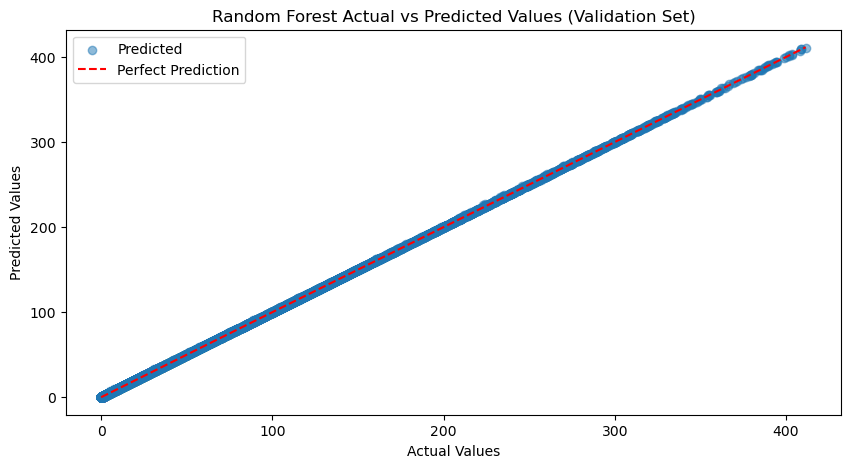

In [91]:
# Plot the Actual vs Predicted for Validation data
plt.figure(figsize=(10, 5))
plt.scatter(y_val, y_val_pred, alpha=0.5, label='Predicted')
plt.plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], 'r--', label='Perfect Prediction')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Random Forest Actual vs Predicted Values (Validation Set)')
plt.legend()
plt.show()

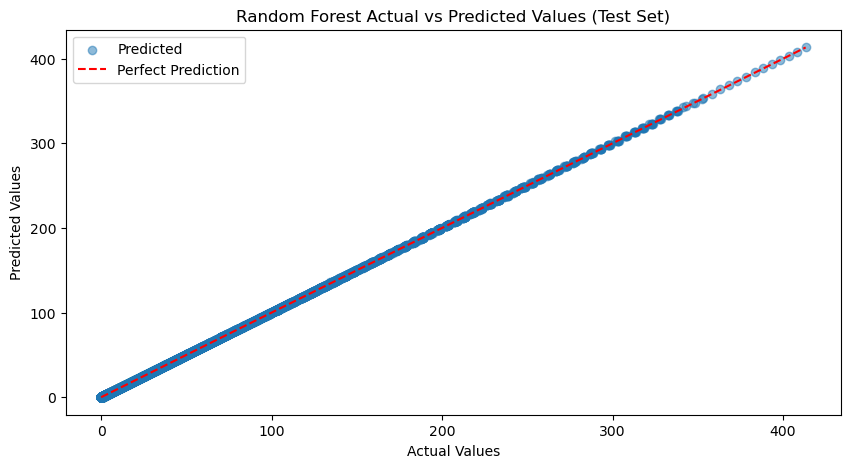

In [92]:
plt.figure(figsize=(10, 5))
plt.scatter(y_test, y_test_pred, alpha=0.5, label='Predicted')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label='Perfect Prediction')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Random Forest Actual vs Predicted Values (Test Set)')
plt.legend()
plt.show()

### Residual Plot for Validation and Test data

In [93]:
# Calculate the residual values
residuals_val = y_val.values.flatten() - y_val_pred
residuals_test = y_test.values.flatten() - y_test_pred

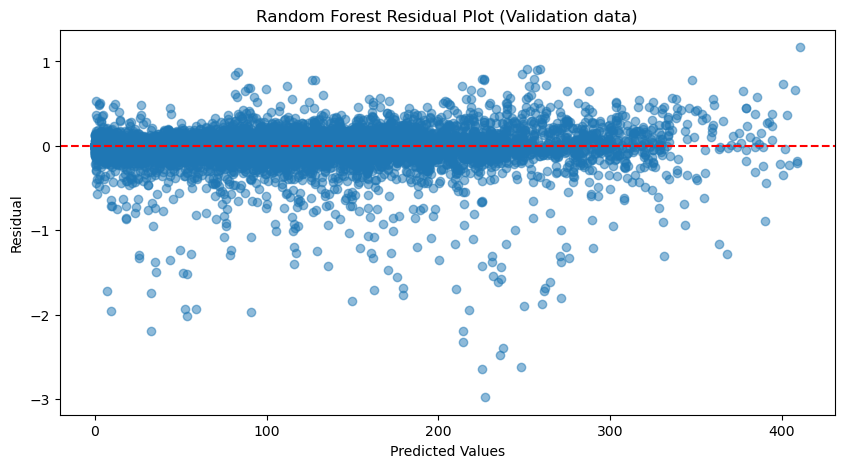

In [94]:
# Plot residuals for validation data
plt.figure(figsize=(10, 5))
plt.scatter(y_val_pred, residuals_val, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residual')
plt.title('Random Forest Residual Plot (Validation data)')
plt.show()

- Residuals are scattered around the zero line, which is a good sign. It tells us that there is no significant bias
- The prediction errors seem small as most values fall between -1 to 1
- There are some outliers where the residuals are larger, indicating instances where the model's predictions were significantly off from the actual values
- The outliers are scattered and dont show a pattern

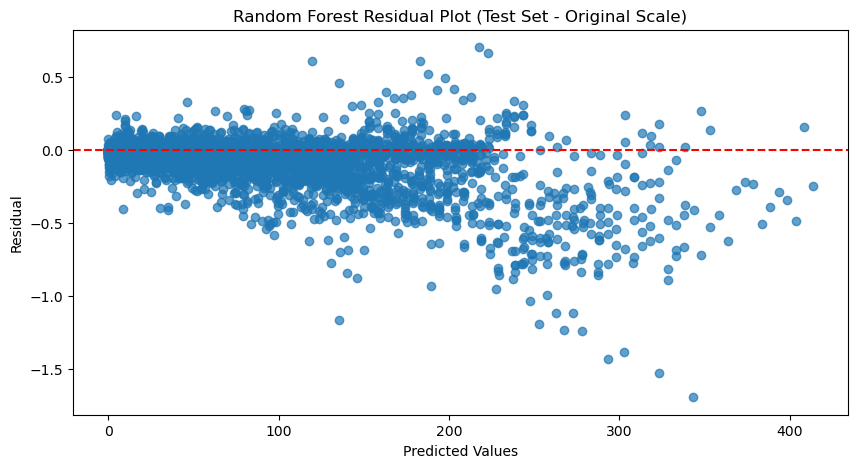

In [95]:
# Plot residuals for test data
plt.figure(figsize=(10, 5))
plt.scatter(y_test_pred, residuals_test, alpha=0.7)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residual')
plt.title('Random Forest Residual Plot (Test Set - Original Scale)')
plt.show()

- Similar to the validation set, the residuals for the test set are also scattered around the zero line, this tells us that there is no significant bias
- Similar to the validation set, there are some outliers with larger residuals,

### Feature Importance

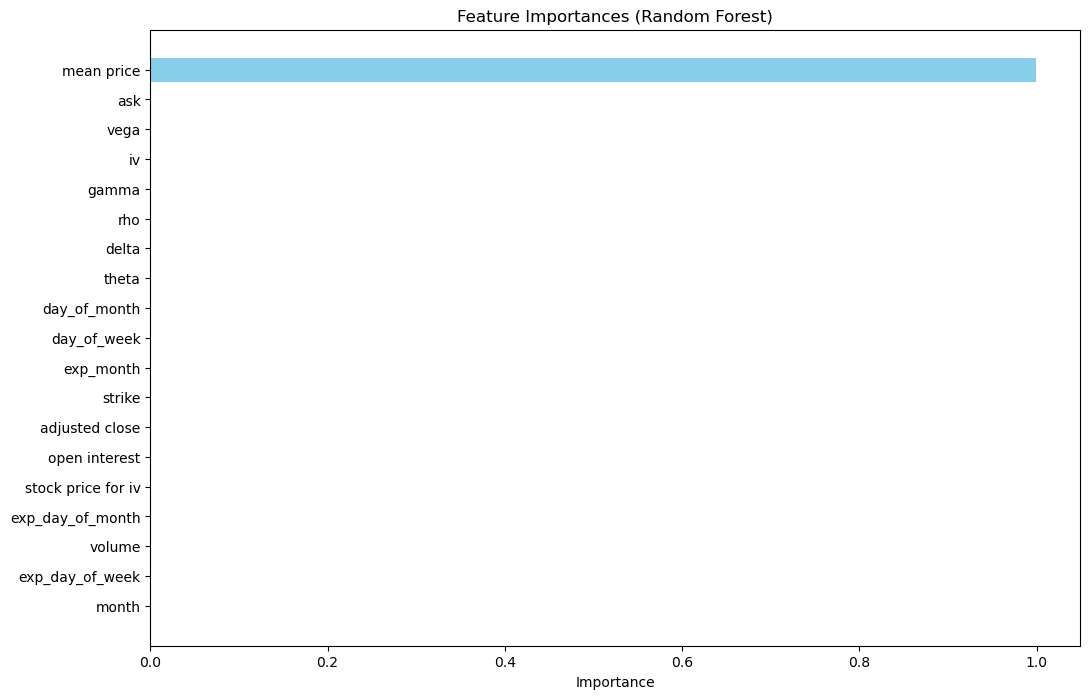

In [97]:
# Get feature importances from the Random Forest model
feature_importances = random_forest_scaled.feature_importances_

# Create a DataFrame for visualization
feature_importance_df = pd.DataFrame({
    'Feature': numerical_features,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(12, 8))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.title('Feature Importances (Random Forest)')
plt.gca().invert_yaxis()
plt.show()

-The feature mean price has the highest importance
- This means mean price is the most influential feature while predicting bid

### We have completed all our models with and without scaling the data

## Data Preprocessing

In [98]:
# Check for missing values
df.isnull().sum()

symbol                     0
exchange                   0
date                       0
adjusted close             0
option symbol              0
expiration                 0
strike                     0
call/put                   0
style                      0
ask                        0
bid                        0
mean price                 0
iv                         0
volume                     0
open interest              0
stock price for iv         0
*                     192007
delta                      0
vega                       0
gamma                      0
theta                      0
rho                        0
day_of_week                0
month                      0
day_of_month               0
exp_day_of_week            0
exp_month                  0
exp_day_of_month           0
dtype: int64

In [99]:
# Dropping the column * as it is redundant column and mostly contain empty value
df.drop('*', axis=1, inplace=True)

In [100]:
# Checking for available columns
df.columns

Index(['symbol', 'exchange', 'date', 'adjusted close', 'option symbol',
       'expiration', 'strike', 'call/put', 'style', 'ask', 'bid', 'mean price',
       'iv', 'volume', 'open interest', 'stock price for iv', 'delta', 'vega',
       'gamma', 'theta', 'rho', 'day_of_week', 'month', 'day_of_month',
       'exp_day_of_week', 'exp_month', 'exp_day_of_month'],
      dtype='object')

In [104]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 221046 entries, 0 to 221045
Data columns (total 27 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   symbol              221046 non-null  object        
 1   exchange            221046 non-null  object        
 2   date                221046 non-null  datetime64[ns]
 3   adjusted close      221046 non-null  float64       
 4   option symbol       221046 non-null  object        
 5   expiration          221046 non-null  datetime64[ns]
 6   strike              221046 non-null  float64       
 7   call/put            221046 non-null  object        
 8   style               221046 non-null  object        
 9   ask                 221046 non-null  float64       
 10  bid                 221046 non-null  float64       
 11  mean price          221046 non-null  float64       
 12  iv                  221046 non-null  float64       
 13  volume              221046 no

In [101]:
df.isnull().sum()

symbol                0
exchange              0
date                  0
adjusted close        0
option symbol         0
expiration            0
strike                0
call/put              0
style                 0
ask                   0
bid                   0
mean price            0
iv                    0
volume                0
open interest         0
stock price for iv    0
delta                 0
vega                  0
gamma                 0
theta                 0
rho                   0
day_of_week           0
month                 0
day_of_month          0
exp_day_of_week       0
exp_month             0
exp_day_of_month      0
dtype: int64

In [102]:
# Drop rows with missing values
print(df.dropna(inplace=True))

None


In [103]:
# Check for duplicates
print(df.duplicated().sum())

0


#### As we can see there are no duplicate value so we don't need to drop any duplicate value

In [108]:
# Lets go through our "symbol" column
df['symbol'].unique()

array(['SPY'], dtype=object)

- Symbol(The underlying stock) has 1 unique value - SPY

In [109]:
# exchange has 1 unique item lets see it
df['exchange'].unique()

array(['NYSEArca'], dtype=object)

- Exchange has 1 unique value - NYSEArca

In [110]:
# Lets go through our "date" columns
df['date'].nunique()

21

We have 21 unique dates in our dataset

In [111]:
# In our dateset which all dates are there
df['date'].unique()

<DatetimeArray>
['2021-07-30 00:00:00', '2021-07-29 00:00:00', '2021-07-28 00:00:00',
 '2021-07-27 00:00:00', '2021-07-26 00:00:00', '2021-07-23 00:00:00',
 '2021-07-22 00:00:00', '2021-07-21 00:00:00', '2021-07-20 00:00:00',
 '2021-07-19 00:00:00', '2021-07-16 00:00:00', '2021-07-15 00:00:00',
 '2021-07-14 00:00:00', '2021-07-13 00:00:00', '2021-07-12 00:00:00',
 '2021-07-09 00:00:00', '2021-07-08 00:00:00', '2021-07-07 00:00:00',
 '2021-07-06 00:00:00', '2021-07-02 00:00:00', '2021-07-01 00:00:00']
Length: 21, dtype: datetime64[ns]

These are all the working days from 1st July 2021 till 30 July 2021 <br>
- 2021-07-01 - Thursday
- 2021-07-02 - Friday
- 2021-07-06 - Tuesday
- 2021-07-07 - Wednesday
- 2021-07-08 - Thursday
- 2021-07-09 - Friday
- 2021-07-12 - Monday
- 2021-07-13 - Tuesday
- 2021-07-14 - Wednesday
- 2021-07-15 - Thursday
- 2021-07-16 - Friday
- 2021-07-19 - Monday
- 2021-07-20 - Tuesday
- 2021-07-21 - Wednesday
- 2021-07-22 - Thursday
- 2021-07-23 - Friday
- 2021-07-26 - Monday
- 2021-07-27 - Tuesday
- 2021-07-28 - Wednesday
- 2021-07-29 - Thursday
- 2021-07-30 - Friday
<BR>
    <BR>
- **No data for 2021-07-05 - Monday - The United States celebrates Independence Day on July 4 every year.  In 2021, that falls on a Sunday, so Monday, July 5, is the associated Federal holiday.** 

In [112]:
# Lets look into style column
df['style'].unique()

array(['A'], dtype=object)

In [113]:
# Lets look into column "adjusted close"
df["adjusted close"].unique()

array([438.51, 440.65, 438.83, 439.01, 441.02, 439.94, 435.46, 434.55,
       431.06, 424.97, 431.34, 434.75, 436.24, 435.59, 437.08, 435.52,
       430.92, 434.46, 432.93, 433.72, 430.43])

In [114]:
# We have 21 values, lets find the minimum and maximum
print("Min of adjusted close: ", df["adjusted close"].unique().min())
print("Max of adjusted close: ", df["adjusted close"].unique().max())

Min of adjusted close:  424.97
Max of adjusted close:  441.02


- The 'adjusted close' column ranges values from 424.97 to 441.02
- There are 21 unique float values
- The closing prices of the stocks fell between the range of 424.97 to 441.02

In [115]:
# Lets look into column "option symbol	"
df["option symbol"]

0         SPY   210730C00215000
1         SPY   210730P00215000
2         SPY   210730C00220000
3         SPY   210730P00220000
4         SPY   210730C00225000
                  ...          
221041    SPY   231215P00630000
221042    SPY   231215C00635000
221043    SPY   231215P00635000
221044    SPY   231215C00640000
221045    SPY   231215P00640000
Name: option symbol, Length: 221046, dtype: object

In [116]:
# Lets see how many unique records we have
print("No of Unique features: ", df["option symbol"].nunique())

No of Unique features:  13960


In [117]:
# There are 13960 Unique "option symbol"
df["option symbol"].unique()

array(['SPY   210730C00215000', 'SPY   210730P00215000',
       'SPY   210730C00220000', ..., 'SPY   210702P00520000',
       'SPY   210702C00530000', 'SPY   210702P00530000'], dtype=object)

In [118]:
# Lets see how many dates in expiration are unique, and lets find out the start and end date of the expiration column
df['expiration'].unique()

<DatetimeArray>
['2021-07-30 00:00:00', '2021-08-02 00:00:00', '2021-08-04 00:00:00',
 '2021-08-06 00:00:00', '2021-08-09 00:00:00', '2021-08-11 00:00:00',
 '2021-08-13 00:00:00', '2021-08-16 00:00:00', '2021-08-18 00:00:00',
 '2021-08-20 00:00:00', '2021-08-23 00:00:00', '2021-08-25 00:00:00',
 '2021-08-27 00:00:00', '2021-08-30 00:00:00', '2021-09-01 00:00:00',
 '2021-09-03 00:00:00', '2021-09-07 00:00:00', '2021-09-10 00:00:00',
 '2021-09-17 00:00:00', '2021-09-30 00:00:00', '2021-10-15 00:00:00',
 '2021-11-19 00:00:00', '2021-12-17 00:00:00', '2021-12-31 00:00:00',
 '2022-01-21 00:00:00', '2022-02-18 00:00:00', '2022-03-18 00:00:00',
 '2022-03-31 00:00:00', '2022-06-17 00:00:00', '2022-06-30 00:00:00',
 '2022-09-16 00:00:00', '2022-12-16 00:00:00', '2023-01-20 00:00:00',
 '2023-03-17 00:00:00', '2023-06-16 00:00:00', '2023-12-15 00:00:00',
 '2021-07-28 00:00:00', '2021-07-26 00:00:00', '2021-07-23 00:00:00',
 '2021-07-21 00:00:00', '2021-07-19 00:00:00', '2021-07-16 00:00:00',
 '20

- 2021-07-02 - Friday
- 2021-07-06 - Tuesday
- 2021-07-07 - Wednesday
- 2021-07-09 - Friday
- 2021-07-12 - Monday
- 2021-07-14 - Wednesday
- 2021-07-16 - Friday
- 2021-07-19 - Monday
- 2021-07-21 - Wednesday
- 2021-07-23 - Friday
- 2021-07-26 - Monday
- 2021-07-28 - Wednesday
- 2021-07-30 - Friday
- 2021-08-02 - Monday
- 2021-08-04 - Wednesday
- 2021-08-06 - Friday
- 2021-08-09 - Monday
- 2021-08-11 - Wednesday
- 2021-08-13 - Friday
- 2021-08-16 - Monday
- 2021-08-18 - Wednesday
- 2021-08-20 - Friday
- 2021-08-23 - Monday
- 2021-08-25 - Wednesday
- 2021-08-27 - Friday
- 2021-08-30 - Monday
- 2021-09-01 - Wednesday
- 2021-09-03 - Friday
- 2021-09-07 - Tuesday
- 2021-09-10 - Friday
- 2021-09-17 - Friday
- 2021-09-30 - Thursday
- 2021-10-15 - Friday
- 2021-11-19 - Friday
- 2021-12-17 - Friday
- 2021-12-31 - Friday
- 2022-01-21 - Friday
- 2022-02-18 - Friday
- 2022-03-18 - Friday
- 2022-03-31 - Thursday
- 2022-06-17 - Friday
- 2022-06-30 - Thursday
- 2022-09-16 - Friday
- 2022-12-16 - Friday
- 2023-01-20 - Friday
- 2023-03-17 - Friday
- 2023-06-16 - Friday
- 2023-12-15 - Friday
<br>
<br>
- The expiration dates start from **2nd July  2021 (Friday) till 15th December 2023(Friday)**

In [121]:
# Lets look into the strike column, whats the number of unique values
print("No of Unique features: ", df["strike"].nunique())

No of Unique features:  312


In [129]:
# lets find the minimum and maximum
print("Min of strike: ", df["strike"].unique().min())
print("Max of strike: ", df["strike"].unique().max())

Min of strike:  25.0
Max of strike:  655.0


- The strike ranges from 25 to 655
- strike: the price that the option gives you the right to trade the underlying stock
- All stocks to trade fall in the range of 25 to 655

In [125]:
# Lets look into the call/put column
df["call/put"].unique()

array(['C', 'P'], dtype=object)

- call/put - whether the option is a Call (right to buy underlying stock) or a Put (right to sell underlying stock)
- Either C or P
- Call option allows you to buy a stock while put allows you to sell the stock

In [126]:
# Lets look into the column "stock price for iv"
df['stock price for iv'].nunique()

21

In [128]:
# lets find the minimum and maximum
print("Min of stock price for iv: ", df['stock price for iv'].unique().min())
print("Max of stock price for iv: ", df['stock price for iv'].unique().max())

Min of stock price for iv:  425.02
Max of stock price for iv:  441.05


- stock price for iv ranges from 425.02 to 441.05
- The closing price of the stock iv ranges from 425.02 to 441.05

In [130]:
# Lets see the range of values of the iv column
print(f"iv column ranges from the min {df['iv'].min()} to the max {df['iv'].max()}")

iv column ranges from the min -1.0 to the max 1.805012


In [131]:
# Lets see the range of values of the volume column
print(f"volume column ranges from the min {df['volume'].min()} to the max {df['volume'].max()}")

volume column ranges from the min 0 to the max 446333


- volume: number of contracts traded today
- This means the minimum contracts traded in a day was 0 and the maximum was 446333

In [142]:
# lets find the minimum and maximum
print("Min of open interest: ", df['open interest'].unique().min())
print("Max of open interest: ", df['open interest'].unique().max())

Min of open interest:  0
Max of open interest:  169905


- open interest: number of contracts currently held
- The number of contracts currently held range from 0 to 169905

In [135]:
# Lets look into delta column
df['delta']

0         0.000000
1         0.000000
2         0.000000
3         0.000000
4         0.000000
            ...   
221041   -0.924500
221042    0.051628
221043   -0.928176
221044    0.048170
221045   -0.931634
Name: delta, Length: 221046, dtype: float64

In [141]:
# lets find the minimum and maximum
print("Min of delta: ", df['delta'].unique().min())
print("Max of delta: ", df['delta'].unique().max())

Min of delta:  -1.0
Max of delta:  1.0


- Delta ranges from -1 to +1

In [140]:
# lets find the minimum and maximum
print("Min of vega: ", df['vega'].unique().min())
print("Max of vega: ", df['vega'].unique().max())

Min of vega:  0.0
Max of vega:  2.674587


- vega ranges from 0 to 2.674587

In [139]:
# lets find the minimum and maximum
print("Min of gamma: ", df['vega'].unique().min())
print("Max of gamma: ", df['vega'].unique().max())

Min of gamma:  0.0
Max of gamma:  2.674587


- Gamma ranges from 0 to 0.185555

In [143]:
# lets find the minimum and maximum
print("Min of theta: ", df['theta'].unique().min())
print("Max of theta: ", df['theta'].unique().max())

Min of theta:  -0.779877
Max of theta:  0.0


-  theta ranges from -0.779877 to 0

In [144]:
# lets find the minimum and maximum
print("Min of rho: ", df['rho'].unique().min())
print("Max of rho: ", df['rho'].unique().max())

Min of rho:  -15.741297
Max of rho:  5.584008


- rho ranges from -15.741297 to 5.584008

In [145]:
# lets find the minimum and maximum
print("Min of ask: ", df['ask'].unique().min())
print("Max of ask: ", df['ask'].unique().max())

Min of ask:  0.01
Max of ask:  416.89


- Ask - ranges from 0.01 to 416.89

In [146]:
# Lets look into bid
df['bid']

0         223.35
1           0.00
2         218.35
3           0.00
4         213.35
           ...  
221041    201.50
221042      1.80
221043    206.50
221044      1.30
221045    211.50
Name: bid, Length: 221046, dtype: float64

In [147]:
# lets find the minimum and maximum
print("Min of bid: ", df['bid'].unique().min())
print("Max of bid: ", df['bid'].unique().max())

Min of bid:  0.0
Max of bid:  415.23


- Bid - Minimum bid is 0, and maximum bid is 415.23

In [148]:
df.head()

,symbol,exchange,date,adjusted close,option symbol,expiration,strike,call/put,style,ask,...,vega,gamma,theta,rho,day_of_week,month,day_of_month,exp_day_of_week,exp_month,exp_day_of_month
0,SPY,NYSEArca,2021-07-30,438.51,SPY 210730C00215000,2021-07-30,215.0,C,A,224.56,...,0.0,0.0,0.0,0.0,4,7,30,4,7,30
1,SPY,NYSEArca,2021-07-30,438.51,SPY 210730P00215000,2021-07-30,215.0,P,A,0.01,...,0.0,0.0,0.0,0.0,4,7,30,4,7,30
2,SPY,NYSEArca,2021-07-30,438.51,SPY 210730C00220000,2021-07-30,220.0,C,A,219.56,...,0.0,0.0,0.0,0.0,4,7,30,4,7,30
3,SPY,NYSEArca,2021-07-30,438.51,SPY 210730P00220000,2021-07-30,220.0,P,A,0.01,...,0.0,0.0,0.0,0.0,4,7,30,4,7,30
4,SPY,NYSEArca,2021-07-30,438.51,SPY 210730C00225000,2021-07-30,225.0,C,A,214.56,...,0.0,0.0,0.0,0.0,4,7,30,4,7,30


#### We have looked into all our columns here is what we have gatherd:
- Symbol(The underlying stock) - has 1 unique value - SPY
- Exchange - has 1 unique value - NYSEArc
- Date - These are all the working days from 1st July 2021 till 30 July 2021, doesnt include 5th July 2021 because it was a federal holiday
- Adjusted close - The 'adjusted close' column ranges values from 424.97 to 441.02
- option symbol - There are 13960 Unique "option symbol"
- expiration - The expiration dates start from 2nd July  2021 (Friday) till 15th December 2023(Friday)
- strike The strike ranges from 25 to 655
- call/put -either C or P - call or put
- Style - 1 unique value - A
- Ask - ranges from 0.01 to 416.89
- Bid - Minimum bid is 0, and maximum bid is 415.23
- iv - iv column ranges from the min -1.0 to the max 1.805012
- volume - The minimum contracts traded in a day was 0 and the maximum was 446333
- open interest - The number of contracts currently held range from 0 to 169905
- stock price for iv - ranges from 425.02 to 441.05
- Delta ranges from -1 to +1
- vega ranges from 0 to 2.674587
- Gamma ranges from 0 to 0.185555
-  theta ranges from -0.779877 to 0
- rho ranges from -15.741297 to 5.584008

### Analysing Outliers

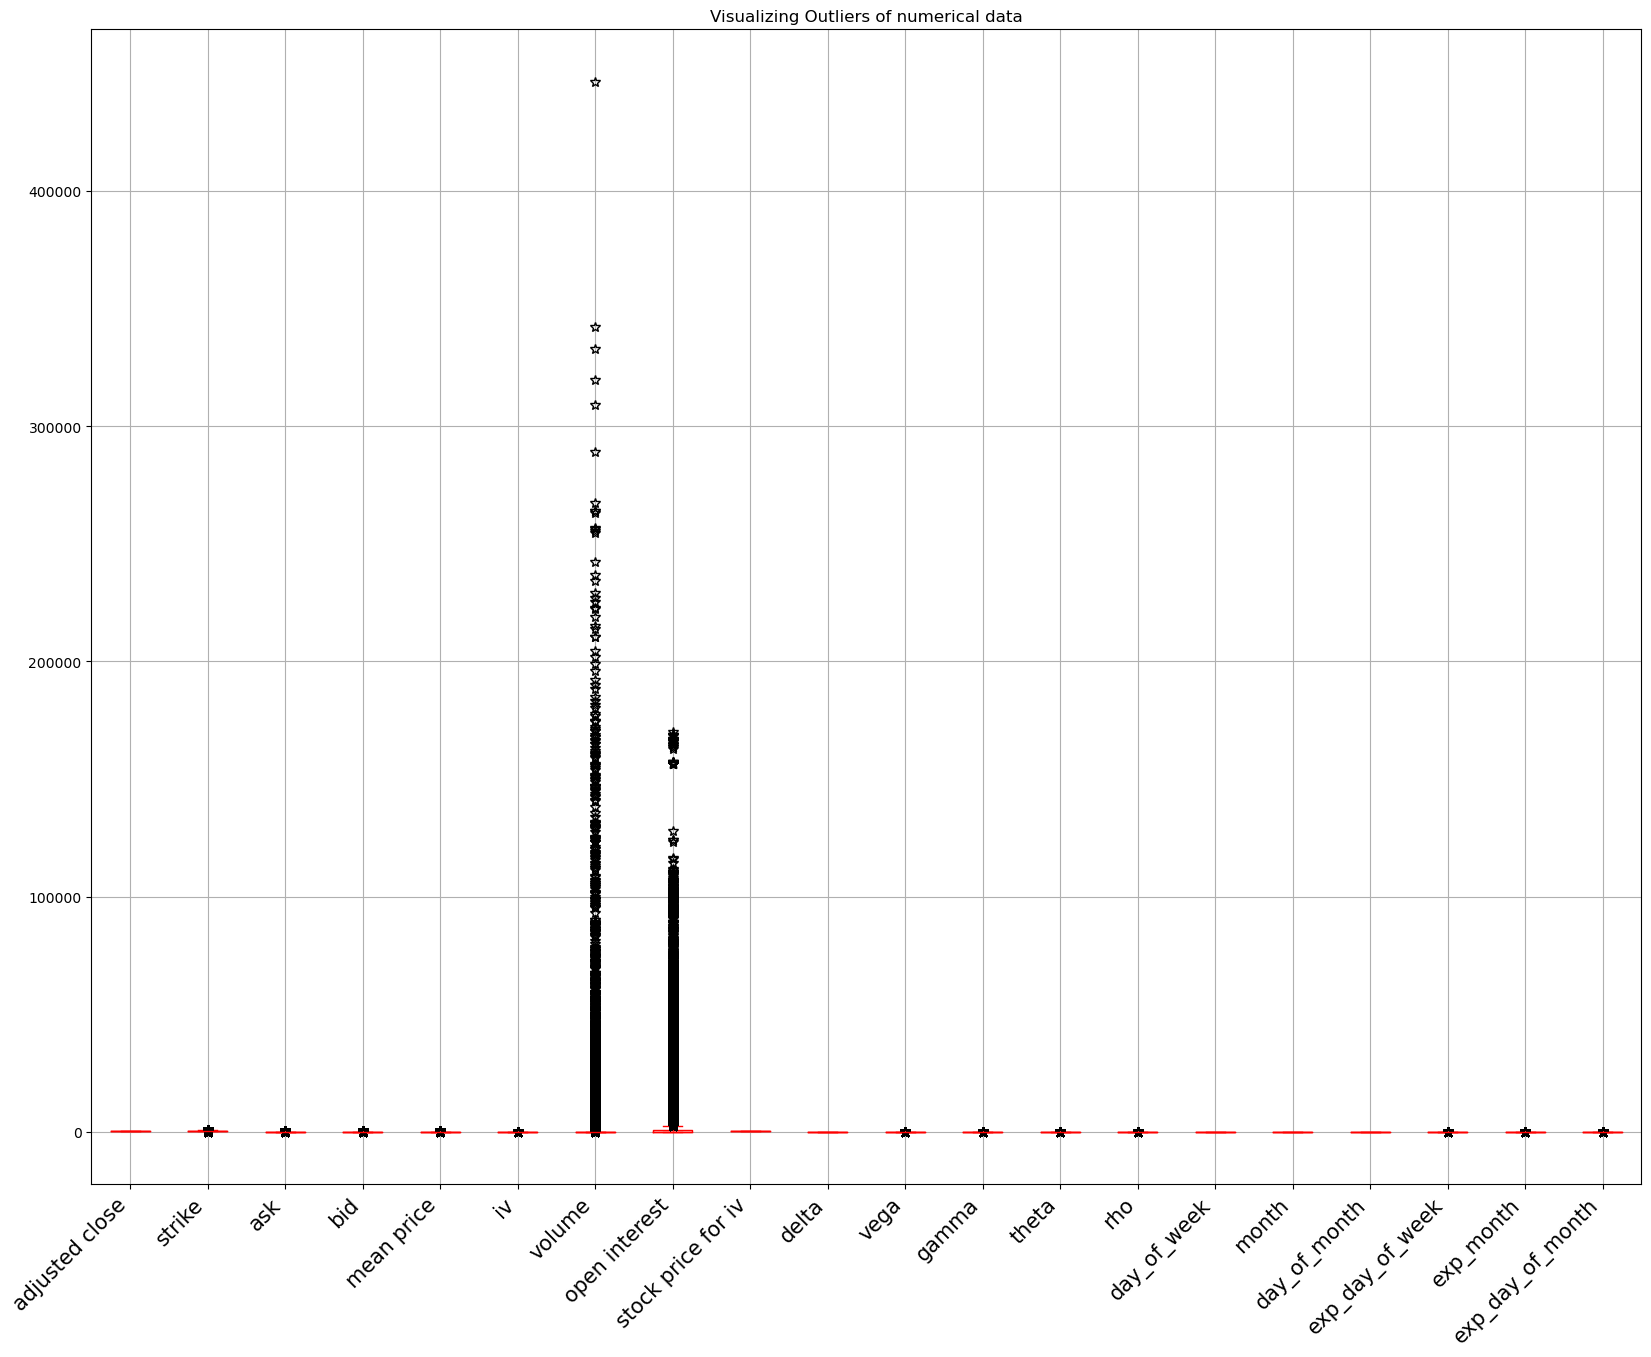

In [149]:

numerical_features = df.select_dtypes(include=['int','float']).columns.tolist()

plt.figure(figsize=(20, 15))  
df[numerical_features].boxplot(color='red',flierprops=dict(marker='*', color='yellow', markersize=7))
plt.xticks(rotation=45, ha='right',size=15)
plt.title('Visualizing Outliers of numerical data')
plt.show()


As we can see the columns **"Volume" and "Open Interest"** have many outliers. 

### Data Aggregation

In [150]:
# Group by symbol and aggregate adjusted close to get the mean and sum
df.groupby('symbol')['adjusted close'].agg(['mean', 'sum'])

,mean,sum
symbol,,
SPY,435.089149,96174716.0


- The average closing price of the underlying stock SPY after the trading session is 435.089149

In [151]:
# Group by call/put and aggregate iv for mean and standard deviation
df.groupby('call/put')['iv'].agg(['mean', 'std'])

,mean,std
call/put,,
C,0.241626,0.238902
P,0.227560,0.210640


- The mean IV is 0.241626, for call and for puts the mean IV is 0.227560, which indicates the average level of fear or uncertainty in the market for Calls.

- The standard deviation of IV is 0.238902, which indicates the volatility of the IV for Calls. Moreover, the standard deviation of IV is 0.210640, which indicates the volatility of the IV for Calls. 

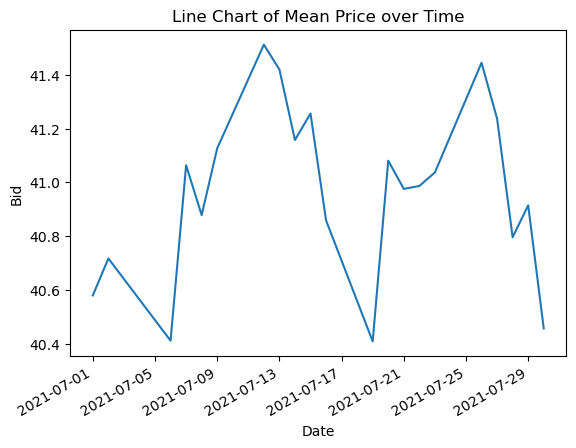

In [152]:
# Ploting the line graph for date and mean_price as to understand the mean price over time
df.groupby('date')['bid'].mean().plot(kind='line')
plt.title('Line Chart of Mean Price over Time')
plt.xlabel('Date')
plt.ylabel('Bid')
plt.show()

As we can see there is a biweekly pattern that shows that there is some seasonality in the data.
The data rises and falls every 2 weeks. We can see the first rise on 6th July 2021 and second rise takes place on 20th July 2021.

### Done by Group 5:
- Daivik Pelathur - c0938273
- Dev Bhagat - c0937406
- Amritpal Singh - C0937405